# The Majority Rule Problem

The objective of the majority rule problem is to find a set of rules that will make the automata collectively decide what state was the most popular at the start of the game. This means finding activation rules so that by the $N$'th time step of the game, all of the cells will either be on or off, depending on whether the majority was on or off at the beginning. 


In [254]:
import numpy as np
import matplotlib.pyplot as plt
from automata import Automata
from time import time
from datetime import timedelta

In [2]:
# generate initial conditions varying uniformly in on and off counts
def make_ics(N, I):
    # generate the probabilities of 0 for all I initial conditions
    densities = np.random.uniform(0,1,I)
    # build an array with a random selection of initial conditions corresponding to each of the 0-probabilities
    # determined in the above step
    ic_list = [np.random.choice(2, N, p=(d, 1-d)) for d in densities]
    
    
    return ic_list

In [3]:
def init_population(N,P,r):
    # strat densities are uniformly distributed (decides the approximate fraction of 1's and 0's in each strat)
    densities = np.random.uniform(0,1,P)
    
    # list of strategies
    rule_list = [np.random.choice(2, 2**(2*r+1),p=(d,1-d)) for d in densities]
    
    return rule_list

In [85]:
def fitness(rule_list, N, I, r):
    
    fitness_list = []
    
    M_mean = N + 20
    
    ic_list = make_ics(N,I)
    targets = [round(np.average(ic)) for ic in ic_list]
    
    ca = Automata(N,r)
    
    # for each rule phi test each of the generated initial conditions
    for rule in rule_list:
      
        ca.update_rule(rule)
        correct = 0
        
        for ic, target in zip(ic_list,targets):
            
            ca.set_begin_state(ic)
            
            # M is chosen from a poission distribution to prevent over fitting to particular lengths of M
            M = np.random.poisson(M_mean)
            
            guess = ca.maj_rule(M)
            
            if guess == target:
                correct = correct + 1
    
        fitness_list.append(correct/I)
      
        
    return fitness_list

In [5]:
def make_offspring(rule_list, fitnesses, N):
    rule_list = np.array(rule_list)
    
    offspring = []
    
    l = len(rule_list[0])
    
    for n in range(N):
        pair = rule_list[np.random.choice(len(rule_list),size=2,p=fitnesses/np.sum(fitnesses))]

        cut = np.random.randint(l)

        offspring.append(np.concatenate((pair[0][0:cut], pair[1][cut:]), axis=0))
        
    return offspring



In [6]:
def make_offspring2(rule_list, fitnesses,N):
    
    rule_list = np.array(rule_list)
    
    offspring=[]
    
    l = len(rule_list[0])
    
    for n in range(N):
        pair = rule_list[np.random.choice(len(rule_list),size=2,p=fitnesses/np.sum(fitnesses))]
        
        prob = np.random.uniform()
        
        mask = np.random.choice([True, False], l, p=(prob,1-prob))
        
        offspring.append(np.where(mask,pair[0],pair[1]))
        
    return offspring
    

In [7]:
def mutate(pop,Pm):
    pop = np.array(pop)
    
    mask = np.random.choice([True,False],pop.shape, p=(1-Pm, Pm))
    
    pop = np.where(mask, pop, np.abs(pop-1))
    
    return list(pop)
    

In [8]:
def mutate2(pop, Nm):
    pop = np.array(pop)
    L = pop.shape[0]
    N = pop.shape[1]
    
    selected = np.random.choice(range(L), (N,Nm))
    
    for i in range(L):
        pop[i][selected[i]] = np.abs(pop[i][selected[i]] - 1)
        
    return list(pop)

In [270]:
#N,P,I,E,G,m
def find_rule(N,P,I,E,G,Pm,r):
    
    start_time = time()
    
    max_fitness = []
    
    pop = init_population(N,P,r)
   
    
    for g in range(G): # generations
            
        new_pop = []
        
        fitnesses = fitness(pop, N, I, r)
        
        max_fitness.append(max(fitnesses))
        
    
       
        print(f'generation {g}:   top fitness = {max(fitnesses)}')
        
        #elite = np.array(pop)[fitness > np.min(np.argpartition(fitness,-E)[-E:])]
        elite = np.array(pop)[np.argsort(fitnesses)][-E:]
        
        
        new_pop += list(elite)
        
        #try changing to new_pop (with both offspring funcs)
#         elite_fitnesses = fitnesses.copy()
#         elite_fitnesses.sort(reverse=True)
#         offspring = make_offspring(new_pop, elite_fitnesses[:E], P-E)
        
        #ALTERNATIVE
        offspring = make_offspring(pop, fitnesses, P-E)
        
    
        offspring = mutate2(offspring, Pm)
        
        new_pop += offspring
       
        
        pop = new_pop.copy()
        
    print() 
    print(f'{timedelta(seconds=round(time()-start_time, 1))} to complete')
    
    fitnesses = fitness(pop, N, I, r)
    
    train_stats = (range(G), max_fitness)
        
    return pop, fitnesses, train_stats

In [272]:
# N = 149 
# P = 100
# E = 20
# I = 100
# Pm = 0.018
# G = 50
# r = 3

N = 149 
P = 100
E = 20
I = 100
Pm = 2
G = 50
r = 3

rule_list, fitnesses, train_data = find_rule(N,P,I,E,G,Pm,r)

generation 0:   top fitness = 0.52
generation 1:   top fitness = 0.53
generation 2:   top fitness = 0.52
generation 3:   top fitness = 0.6
generation 4:   top fitness = 0.58
generation 5:   top fitness = 0.56
generation 6:   top fitness = 0.53
generation 7:   top fitness = 0.53
generation 8:   top fitness = 0.72
generation 9:   top fitness = 0.86
generation 10:   top fitness = 0.81
generation 11:   top fitness = 0.82
generation 12:   top fitness = 0.88
generation 13:   top fitness = 0.91
generation 14:   top fitness = 0.87
generation 15:   top fitness = 0.91
generation 16:   top fitness = 0.92
generation 17:   top fitness = 0.89
generation 18:   top fitness = 0.89
generation 19:   top fitness = 0.9
generation 20:   top fitness = 0.93
generation 21:   top fitness = 0.92
generation 22:   top fitness = 0.88
generation 23:   top fitness = 0.93
generation 24:   top fitness = 0.96
generation 25:   top fitness = 0.92
generation 26:   top fitness = 0.93
generation 27:   top fitness = 0.92
gene

Text(0, 0.5, 'best fitness')

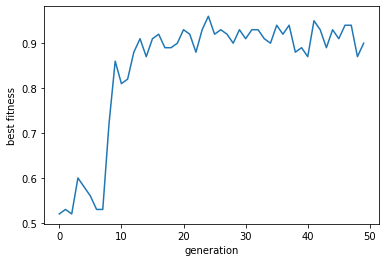

In [273]:
plt.plot(train_data[0],train_data[1])
plt.xlabel('generation')
plt.ylabel('best fitness')

In [274]:
ca = Automata(N,r)
rho = .5
ic = np.random.choice(2,N,p=(rho,1-rho))
ca.set_begin_state(ic)

sorted_rule_list = np.array(rule_list)[np.argsort(-np.array(fitnesses))]
sorted_fitnesses = np.array(fitnesses)[np.argsort(-np.array(fitnesses))]

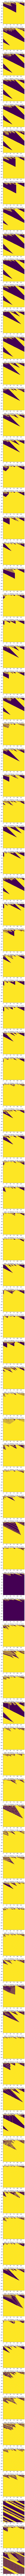

In [275]:

plt.figure(figsize=(7,500))

for p in range(P):
    plt.subplot(P,1,p+1)
    
    ca.update_rule(sorted_rule_list[p])
    game = ca.play(N)

    plt.title(fr'rank = {p}, fitness = {sorted_fitnesses[p]}, $\rho$ = {round(np.sum(game[0])/game.shape[1],2)}')
    plt.imshow(game)

In [291]:
ca = Automata(N,r)
rho = .5
ic = np.random.choice(2,N,p=(rho,1-rho))
ca.set_begin_state(ic)

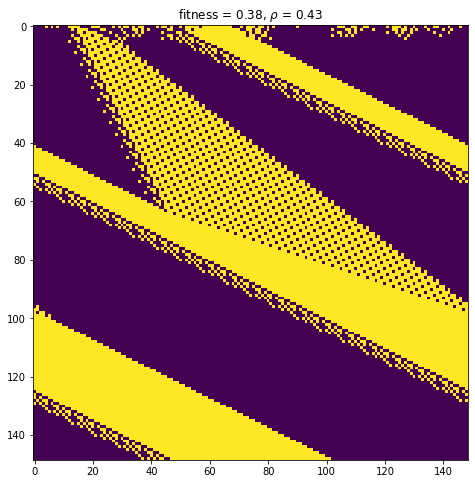

In [292]:
rank = 99

ca.update_rule(sorted_rule_list[rank])
game = ca.play(N)

plt.figure(figsize=(8,8))
plt.title(fr'fitness = {sorted_fitnesses[rank]}, $\rho$ = {round(np.sum(game[0])/game.shape[1],2)}')
plt.imshow(game)

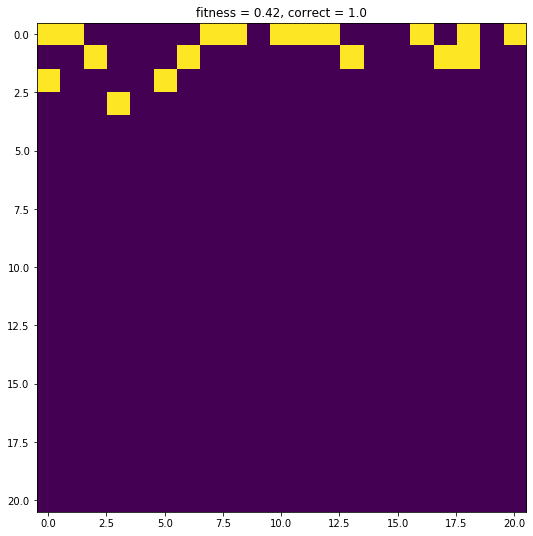

In [62]:
rank = 5

phi_list = solns[0]
fitnesses = solns[1]

phi_list = np.array(phi_list)[np.argsort(fitnesses)]
fitnesses = np.array(fitnesses)[np.argsort(fitnesses)]

ca.update_rule(phi_list[P - rank - 1])
game = ca.play(N)

target = round(np.average(ic))

plt.figure(figsize=(9,9))
plt.title(f'fitness = {fitnesses[P - rank - 1]}, correct = {target}')
plt.imshow(game)
#rank: {rank}, 

# ca = Automata(149,3)

In [48]:
pop = init_population(149,3,3)

In [49]:
fs = fitness(pop, 149,20,3)

In [50]:
fs

[0.0, 0.0, 0.0]

In [55]:
ca.update_rule(pop[2])

triggered
[1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 1]
[1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 1]


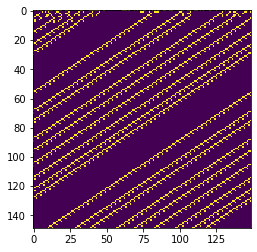

In [56]:
g = ca.play(149)
plt.imshow(g)

In [129]:
guess = ca.maj_rule(149)
guess

0.9060402684563759

In [130]:
target = round(np.average(ic))
target

1.0

In [131]:
if guess == target:
    print('asdf')

In [132]:
ic

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [133]:
game[0]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [2]:
ca = Automata(149,3)

In [3]:
g = ca.play(5)

triggered
[0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 1]
[0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 1]


In [4]:
g.shape

(5, 149)

In [7]:
print(g[0])

[0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 1]


In [6]:
ca.begin_state

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1])

In [140]:
for i in range(1,5):
    print(i)

1
2
3
4
